In [1]:
from telofinder import analyze_telom_length as atl
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pybedtools
from Bio import SeqIO

In [2]:
plt.rcParams['figure.figsize'] = (18, 8)
pd.set_option('display.max_rows', 100)

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

# AFI_chrI

In [50]:
df, telo_df, telo_df_merged  = atl.run_telofinder("../data/AFI_chrI.fa", 0.8, 0.8, 20000)

Running in single fasta mode on '../data/AFI_chrI.fa'

 ------------------------------- 

file AFI_chrI executed
chromosome chrI done


In [51]:
telo_df

,strain,chrom,side,type,start,end,len
0,AFI_chrI,chrI,Left,term,1,146,146
1,AFI_chrI,chrI,Left,intern,132,151,20
2,AFI_chrI,chrI,Left,intern,18003,18031,29
3,AFI_chrI,chrI,Right,term,203842,204004,163
4,AFI_chrI,chrI,Right,intern,203837,203856,20


In [52]:
telo_df_merged

,strain,chrom,side,type,start,end,len
0,AFI_chrI,chrI,Left,term,1,151,151
1,AFI_chrI,chrI,Left,intern,18003,18031,29
2,AFI_chrI,chrI,Right,term,203837,204004,168


In [29]:
for chr in SeqIO.parse("../data/AFI_chrI.fa", "fasta"):
    print(len(chr.seq))

204004


# AAR_chrIV

In [5]:
df, telo_df, telo_df_merged  = atl.run_telofinder("../data/AAR_chrIV", 0.8, 0.8, 20000)

Running in single fasta mode on '../data/AAR_chrIV'

 ------------------------------- 

file AAR_chrIV executed
chromosome chrIV done


In [6]:
telo_df

,strain,chrom,side,type,start,end,len
0,AAR_chrIV,chrIV,Left,term,1,241,241
1,AAR_chrIV,chrIV,Right,term,1510641,1510888,248
2,AAR_chrIV,chrIV,Right,intern,1510579,1510641,63
3,AAR_chrIV,chrIV,Right,intern,1510627,1510647,21
4,AAR_chrIV,chrIV,Right,intern,1510630,1510649,20
5,AAR_chrIV,chrIV,Right,intern,1510632,1510652,21


In [7]:
telo_df_merged

,strain,chrom,side,type,start,end,len
0,AAR_chrIV,chrIV,Left,term,1,241,241
1,AAR_chrIV,chrIV,Right,intern,1510579,1510888,310


In [22]:
for chr in SeqIO.parse("../data/AAR_chrIV", "fasta"):
    print(len(str(chr.seq)))

1510888


# ADQ final assembly

In [4]:
df, telo_df, telo_df_merged  = atl.run_telofinder("../../data/assemblies/homozygous_final/ADQ.trim.fa", 0.8, 0.8, 20000)

Running in single fasta mode on '../../data/assemblies/homozygous_final/ADQ.trim.fa'

 ------------------------------- 

file ADQ.trim executed
chromosome chrI done
chromosome chrII done
chromosome chrIII done
chromosome chrIV done
chromosome chrIX done
chromosome chrV done
chromosome chrVI done
chromosome chrVII done
chromosome chrVIII done
chromosome chrX done
chromosome chrXI done
chromosome chrXII done
chromosome chrXIII done
chromosome chrXIV done
chromosome chrXV done
chromosome chrXVI done


FileExistsError: [Errno 17] File exists: 'telofinder_results'

In [47]:
bed  = atl.run_on_single_fasta("../../data/assemblies/homozygous_final/ADQ.trim.fa", 0.8, 0.8, 20000)


 ------------------------------- 

file ADQ.trim executed


In [48]:
bed.head()

chrI	-1	21
 

In [542]:
bed_merged

,start,end,side,type,chrom
0,None,None,Left,term,chrIII
1,None,None,Left,intern,chrIII
2,None,None,Right,term,chrIII
3,None,None,Right,intern,chrIII


# AAR final assembly

In [533]:
raw_df, telo_df, merged_telo_df = atl.run_telofinder("../../data/assemblies/homozygous_final/AAR.trim.fa", 0.8, 0.8, 20000) 

Running in single fasta mode on '../../data/assemblies/homozygous_final/AAR.trim.fa'

 ------------------------------- 

file AAR.trim executed
chromosome chrI
chromosome chrII
chromosome chrIII
chromosome chrIV
chromosome chrIX
chromosome chrV
chromosome chrVI
chromosome chrVII
chromosome chrVIII
chromosome chrX
chromosome chrXI
chromosome chrXII
chromosome chrXIII
chromosome chrXIV


BEDToolsError: 
Command was:

	bedtools sort -i file

Error message was:
Unexpected file format.  Please use tab-delimited BED, GFF, or VCF. Perhaps you have non-integer starts or ends at line 1?


In [513]:
bed_df = telo_df[["chrom", "start", "end", "type"]].copy()
bed_df.dropna(inplace=True)
bed_df.to_csv("file", sep="\t", header=None, index=False)

In [516]:
bed_f = pybedtools.BedTool("file")

In [518]:
b = bed_f.sort()

In [520]:
c = b.merge()

In [524]:
d = c.to_dataframe()

In [525]:
d["len"] = d["end"] - d["start"] + 1

In [523]:
result = pd.merge(d,
                 telo_df.dropna()[['strain', 'chrom', 'side', 'type', 'start']],
                 on=['chrom', 'start'], 
                 how='left')
result

,chrom,start,end,len,strain,side,type
0,chrI,1,259,259,AAR.trim,Left,term
1,chrI,15783,15813,31,AAR.trim,Left,intern
2,chrI,198316,198590,275,AAR.trim,Right,term
3,chrII,1,309,309,AAR.trim,Left,term
4,chrII,5693,5716,24,AAR.trim,Left,intern
5,chrII,5759,5812,54,AAR.trim,Left,intern
6,chrII,793445,793502,58,AAR.trim,Right,intern
7,chrII,800159,800423,265,AAR.trim,Right,term
8,chrIII,1,227,227,AAR.trim,Left,term
9,chrIII,339972,340239,268,AAR.trim,Right,intern


# AAR final assembly

In [314]:
raw_df, telo_df = atl.run_telofinder("../../data/assemblies/homozygous_final/AAR.trim.fa", 0.8, 0.8, -1)

Running in single fasta mode on '../../data/assemblies/homozygous_final/AAR.trim.fa'

 ------------------------------- 

file AAR.trim executed
chromosome chrI
chromosome chrII
chromosome chrIII
chromosome chrIV
chromosome chrIX
chromosome chrV
chromosome chrVI
chromosome chrVII
chromosome chrVIII
chromosome chrX
chromosome chrXI
chromosome chrXII
chromosome chrXIII
chromosome chrXIV
chromosome chrXV
chromosome chrXVI


In [315]:
telo_df

,strain,chrom,side,type,start,end,len
0,AAR.trim,chrI,Left,term,1,254,254
1,AAR.trim,chrI,Left,intern,240,259,20
2,AAR.trim,chrI,Left,intern,15783,15813,31
3,AAR.trim,chrI,Right,term,198316,198590,275
0,AAR.trim,chrII,Left,term,1,309,309
1,AAR.trim,chrII,Left,intern,5693,5716,24
2,AAR.trim,chrII,Left,intern,5759,5812,54
3,AAR.trim,chrII,Left,intern,485135,485156,22
4,AAR.trim,chrII,Left,intern,660774,660795,22
5,AAR.trim,chrII,Left,intern,661686,661706,21


In [316]:
telo_df.query("type=='term'")

,strain,chrom,side,type,start,end,len
0,AAR.trim,chrI,Left,term,1,254,254
3,AAR.trim,chrI,Right,term,198316,198590,275
0,AAR.trim,chrII,Left,term,1,309,309
6,AAR.trim,chrII,Right,term,800159,800423,265
0,AAR.trim,chrIII,Left,term,1,227,227
1,AAR.trim,chrIII,Right,term,345980,346238,259
0,AAR.trim,chrIV,Left,term,1,241,241
5,AAR.trim,chrIV,Right,term,1510641,1510888,248
0,AAR.trim,chrIX,Left,term,1,255,255
1,AAR.trim,chrIX,Right,term,420634,420959,326


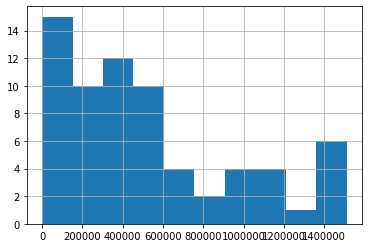

In [318]:
telo_df.query("type=='intern'").start.dropna().hist()

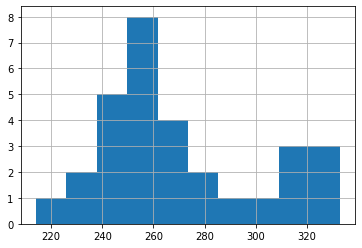

In [305]:
telo_df.query("type=='term'").len.dropna().hist()

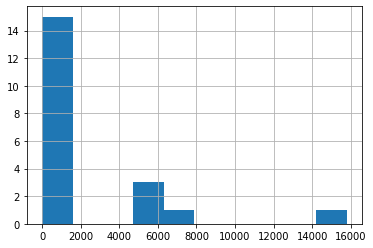

In [309]:
telo_df.query(("type=='intern'") and ("side=='Left'")).start.dropna().hist()

# Data dir

In [313]:
tf.telofinder_path

'/Users/gilles/Documents/DUBii/Projet'

In [155]:
raw_df, telo_df = atl.run_telofinder("../data", 0.8, 0.8)

Running in iterative mode on all '*.fasta', '*.fas', '*.fa' files in '../data'

 test.telo.blocks 

chrI_ACA_left
---------------------
left telom length =  218
left offset =  0
right telom length =  0
right offset =  0

 ------------------------------- 


 test.telo.blocks 

utg84
---------------------
left telom length =  114
left offset =  0
right telom length =  0
right offset =  0

 ------------------------------- 


 test.telo.blocks 

chrI
---------------------
left telom length =  251
left offset =  0
right telom length =  0
right offset =  0

 ------------------------------- 


 test.telo.blocks 

chrVI
---------------------
left telom length =  370
left offset =  0
right telom length =  18
right offset =  475

 ------------------------------- 


 test.telo.blocks 

APG_utg10
---------------------
left telom length =  282
left offset =  0
right telom length =  144
right offset =  0

 ------------------------------- 


 utg84 

utg84
---------------------
left telom length =  1

In [156]:
raw_df

pattern   entropy  polynuc  predict_telom
test.telo.blocks chrI_ACA_left 0  W      1.0  0.647447      1.0            1.0
                               1  W      1.0  0.647447      1.0            1.0
                               2  W      1.0  0.610864      1.0            1.0
                               3  W      1.0  0.610864      1.0            1.0
                               4  W      1.0  0.562335      1.0            1.0
...                                      ...       ...      ...            ...
test             CDA_utg24     23 C      0.0  0.855689      0.0            0.0
                               22 C      0.0  0.688139      0.0            0.0
                               21 C      0.0  0.688139      0.0            0.0
                               20 C      0.0  0.673012      0.0            0.0
                               19 C      0.0  0.673012      0.0            0.0

[201970 rows x 4 columns]

In [162]:
telo_df.query("(type=='intern') and (start < 50)")

,strain,chrom,side,type,start,end,len
1,test.telo.blocks,utg84,Left,intern,33,98,66
1,utg84,utg84,Left,intern,33,98,66
2,test_N,50N+tel_L,Right,intern,40,69,30
2,test_N,utg2,Right,intern,20,42,23
1,test_N,utg84,Left,intern,33,98,66
2,test_fasta_offset,offset20G,Right,intern,20,42,23
1,test_fasta_offset,utg84,Left,intern,33,98,66
1,representatives,ANL_utg84,Left,intern,33,98,66
0,representatives,BAQ_utg1618,Left,intern,45,64,20
1,representatives,CDA_utg24,Left,intern,46,75,30


# Representatives

In [150]:
raw_df, telo_df = atl.run_telofinder("../data/representatives.fasta", 0.8, 0.8)

Running in single fasta mode on '../data/representatives.fasta'

 representatives 

AAB_utg31
---------------------
left telom length =  282
left offset =  0
right telom length =  0
right offset =  0

 ------------------------------- 


 representatives 

ANL_utg84
---------------------
left telom length =  114
left offset =  0
right telom length =  0
right offset =  0

 ------------------------------- 


 representatives 

BAQ_utg1618
---------------------
left telom length =  31
left offset =  34
right telom length =  0
right offset =  0

 ------------------------------- 


 representatives 

APG_utg10
---------------------
left telom length =  0
left offset =  0
right telom length =  79
right offset =  0

 ------------------------------- 


 representatives 

CEI_utg33
---------------------
left telom length =  0
left offset =  0
right telom length =  27
right offset =  0

 ------------------------------- 


 representatives 

CDA_utg24
---------------------
left telom length =  29


In [152]:
telo_df

,strain,chrom,side,type,start,end,len
0,representatives,AAB_utg31,Left,term,1,270,270
1,representatives,AAB_utg31,Right,term,NaN,NaN,NaN
2,representatives,AAB_utg31,Right,intern,NaN,NaN,NaN
0,representatives,ANL_utg84,Left,term,1,30,30
1,representatives,ANL_utg84,Left,intern,33,98,66
...,...,...,...,...,...,...,...
4,representatives,CDG_utg185,Left,intern,163,195,33
5,representatives,CDG_utg185,Left,intern,195,214,20
6,representatives,CDG_utg185,Left,intern,197,222,26
7,representatives,CDG_utg185,Right,term,NaN,NaN,NaN


## UTG84

In [361]:
#seq_df = atl.run_telofinder("../data/test.telo.blocks.fasta")
seq_df_utg84, telo_utg84 = atl.run_telofinder("../data/utg84.fasta", 0.8, 0.8, 20000)

Running in single fasta mode on '../data/utg84.fasta'

 ------------------------------- 

file utg84 executed
chromosome utg84


In [362]:
seq_df_utg84

entropy  polynuc  predict_telom
utg84 utg84 0   W  0.647447      1.0            1.0
            1   W  0.647447      1.0            1.0
            2   W  0.647447      1.0            1.0
            3   W  0.647447      1.0            1.0
            4   W  0.673012      1.0            1.0
...                     ...      ...            ...
            363 C  1.094056      0.0            0.0
            362 C  1.142120      0.0            0.0
            361 C  1.192195      0.0            0.0
            360 C  1.205628      0.0            0.0
            359 C  1.205628      0.0            0.0

[39962 rows x 3 columns]

In [40]:
a = []

In [42]:
for i in a:
    print("test")

In [370]:
cons_group = atl.get_consecutive_groups(seq_df_utg84)
cons_group

{'W': [(0, 10),
  (32, 78),
  (135, 163),
  (197, 245),
  (277, 280),
  (294, 294),
  (299, 315),
  (347, 347),
  (349, 349),
  (353, 353),
  (355, 355),
  (357, 421),
  (442, 468),
  (493, 554),
  (576, 612),
  (644, 742),
  (745, 745),
  (747, 747),
  (750, 753),
  (763, 764),
  (768, 768),
  (774, 774),
  (776, 776),
  (778, 780),
  (805, 809),
  (829, 897),
  (906, 906),
  (911, 912),
  (917, 1838),
  (1840, 1840)],
 'C': []}

In [371]:
atl.classify_telomere(seq_df_utg84, 20000)

KeyError: 'W'

In [26]:
atl.classify_telomere(seq_df_utg84, cons_group)

{'Left_term': (0, 10),
 'Left_intern': [(32, 78),
  (135, 163),
  (197, 245),
  (277, 280),
  (294, 294),
  (299, 315),
  (347, 347),
  (349, 349),
  (353, 353),
  (355, 355),
  (357, 421),
  (442, 468),
  (493, 554),
  (576, 612),
  (644, 742),
  (745, 745),
  (747, 747),
  (750, 753),
  (763, 764),
  (768, 768),
  (774, 774),
  (776, 776),
  (778, 780),
  (805, 809),
  (829, 897),
  (906, 906),
  (911, 912),
  (917, 1838),
  (1840, 1840)],
 'Right_term': [],
 'Right_intern': []}

In [ ]:
pd.DataFrame(atl.classify_telomere(seq_df_utg84, cons_group))

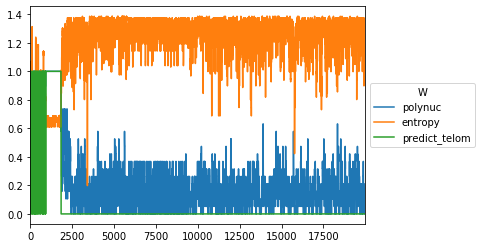

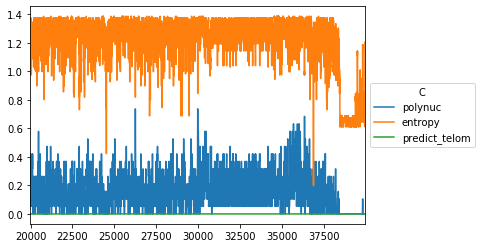

In [27]:
atl.plot_telom(seq_df_utg84)

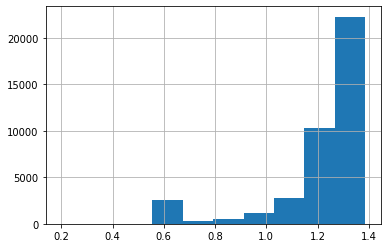

In [21]:
seq_df_utg84.entropy.hist()

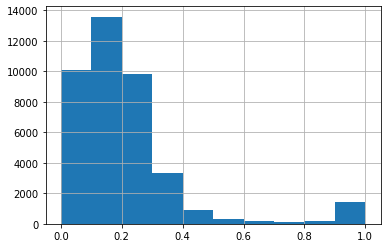

In [20]:
seq_df_utg84.polynuc.hist()

In [95]:
seq_df_utg84["predict_telom"].isna().sum()

0

In [ ]:
seq_df_utg84.loc["utg84", "utg84"].loc[0:3000, ["polynuc_med", "entropy_med", "predict_telom"]].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

## test_fasta_file_40

In [143]:
#seq_df = atl.run_telofinder("../data/test.telo.blocks.fasta")
seq_df_test, telo_df = atl.run_telofinder("../data/test_fasta_file_40.fasta", 0.8, 0.8)
#seq_dico_test = atl.run_telofinder("../data/test_fasta_file_40.fasta", 0.7, 1.1)

Running in single fasta mode on '../data/test_fasta_file_40.fasta'

 test_fasta_file_40 

test
---------------------
left telom length =  37
left offset =  0
right telom length =  63
right offset =  0

 ------------------------------- 



In [129]:
atl.get_consecutive_groups(seq_df_test)

{'W': [(0, 17), (168, 168)], 'C': [(252, 294)]}

In [128]:
len("CACCACACACCACCACCACCACCACCCACCCACCCA")

36

In [132]:
atl.classify_telomere(seq_df_test, atl.get_consecutive_groups(seq_df_test))

[{'start': 1, 'end': 36, 'side': 'Left', 'type': 'term'},
 {'start': 169, 'end': 187, 'side': 'Left', 'type': 'intern'},
 {'start': 253, 'end': 313, 'side': 'Right', 'type': 'term'}]

In [131]:
seq_df_test

pattern   entropy  polynuc  predict_telom
test_fasta_file_40 test 0  W      1.0  0.647447      1.0            1.0
                        1  W      1.0  0.673012      1.0            1.0
                        2  W      1.0  0.647447      1.0            1.0
                        3  W      1.0  0.647447      1.0            1.0
                        4  W      1.0  0.673012      1.0            1.0
...                               ...       ...      ...            ...
                        23 C      0.0  0.673012      0.0            0.0
                        22 C      0.0  0.647447      0.0            0.0
                        21 C      0.0  0.647447      0.0            0.0
                        20 C      0.0  0.673012      0.0            0.0
                        19 C      0.0  0.647447      0.0            0.0

[552 rows x 4 columns]

In [144]:
telo_df

,strain,chrom,side,type,start,end,len
0,test_fasta_file_40,test,Left,term,1,37,37
1,test_fasta_file_40,test,Left,intern,169,188,20
2,test_fasta_file_40,test,Right,term,253,314,62


In [138]:
atl.get_consecutive_groups(seq_df_test)

{'W': [(0, 17), (168, 168)], 'C': [(252, 294)]}

In [372]:
atl.classify_telomere(seq_df_test, atl.get_consecutive_groups(seq_df_test))

KeyError: 'W'

In [224]:
list(seq_df_test.query("(level_3=='C') and (predict_telom==1)").level_2)

UndefinedVariableError: name 'level_3' is not defined

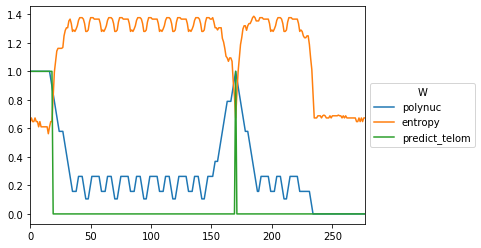

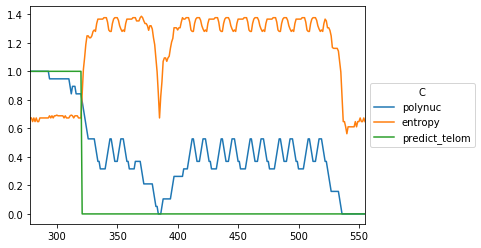

In [34]:
atl.plot_telom(seq_df_test)

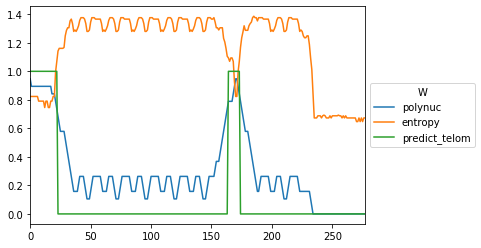

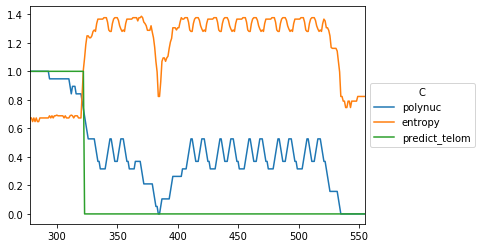

In [11]:
atl.plot_telom(seq_df_test)

## ChrI_ACA_left

In [131]:
seq_df_teloblocks = atl.run_telofinder("../data/test.telo.blocks.fasta", 0.7, 1.1)

Running in single fasta mode on '../data/test.telo.blocks.fasta'

 test.telo.blocks 

chrI_ACA_left
---------------------
left telom length =  218
left offset =  0
right telom length =  0
right offset =  0

 ------------------------------- 


 test.telo.blocks 

utg84
---------------------
left telom length =  114
left offset =  0
right telom length =  0
right offset =  0

 ------------------------------- 


 test.telo.blocks 

chrI
---------------------
left telom length =  251
left offset =  0
right telom length =  0
right offset =  0

 ------------------------------- 


 test.telo.blocks 

chrVI
---------------------
left telom length =  370
left offset =  0
right telom length =  18
right offset =  475

 ------------------------------- 



/home/khourhin/programs/miniconda3/envs/bio/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


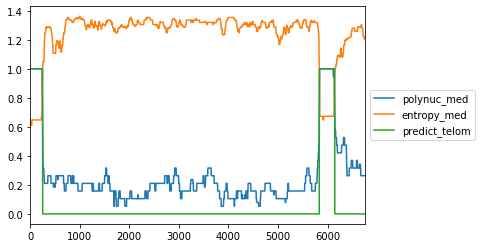

In [132]:
seq_df_teloblocks.loc["test.telo.blocks", "chrI_ACA_left"].loc[0:7000, ["polynuc_med", "entropy_med", "predict_telom"]].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

/home/khourhin/programs/miniconda3/envs/bio/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


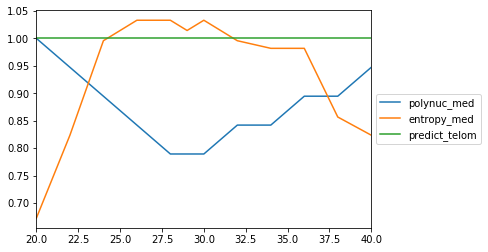

In [133]:
seq_df_teloblocks.loc["test.telo.blocks", "utg84"].loc[20:40, ["polynuc_med", "entropy_med", "predict_telom"]].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

/home/khourhin/programs/miniconda3/envs/bio/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


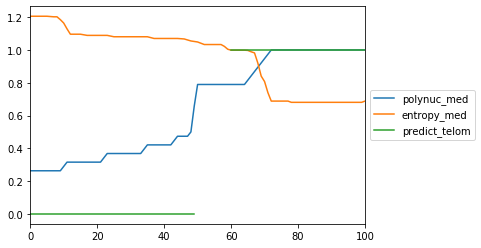

In [77]:
seq_df_teloblocks.loc["test.telo.blocks", "utg84"].loc[0:100, ["polynuc_med", "entropy_med", "predict_telom"]].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

/home/khourhin/programs/miniconda3/envs/bio/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


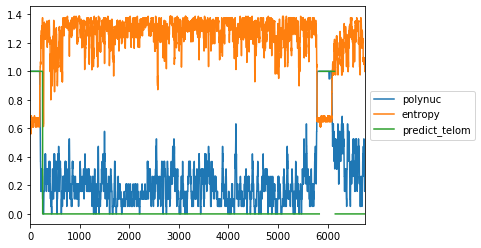

In [18]:
seq_df_teloblocks.loc["test.telo.blocks", "chrI_ACA_left"].loc[0:7000, ["polynuc", "entropy", "predict_telom"]].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

## LEGACY

/home/khourhin/programs/miniconda3/envs/bio/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


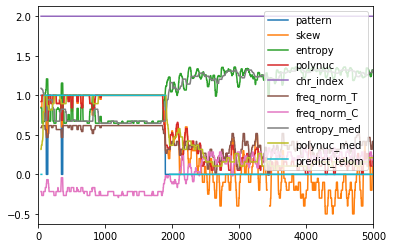

In [9]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:5000].rolling(40).median().plot()

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


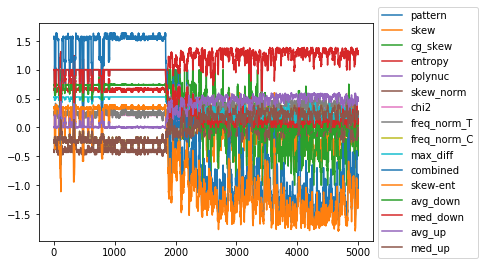

In [256]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:5000].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


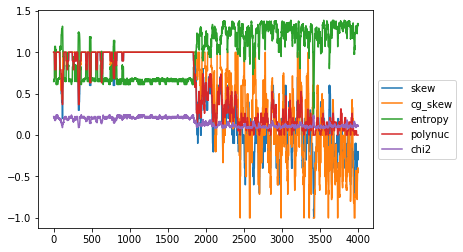

In [257]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:4000, ["skew", "cg_skew", "entropy", "polynuc", "chi2"]].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


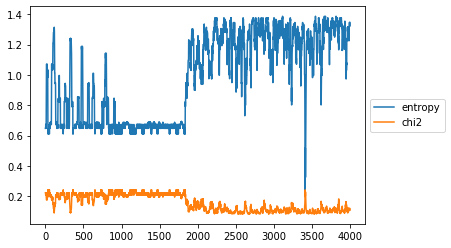

In [258]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:4000, ["entropy", "chi2"]].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


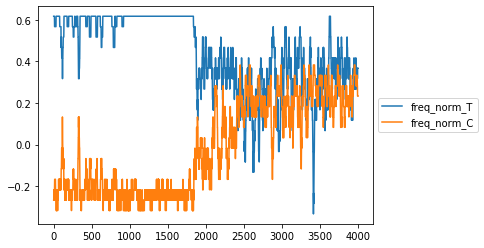

In [414]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:4000, ["freq_norm_T", "freq_norm_C"]].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


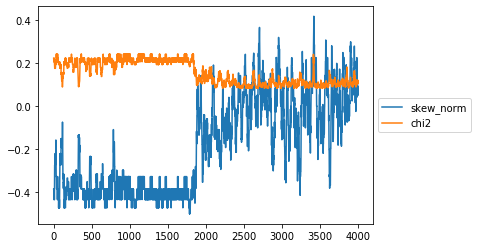

In [259]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:4000, ["skew_norm", "chi2"]].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


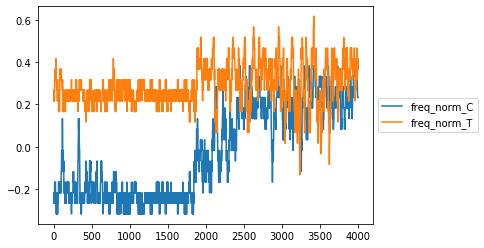

In [260]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:4000, ["freq_norm_C", "freq_norm_T"]].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


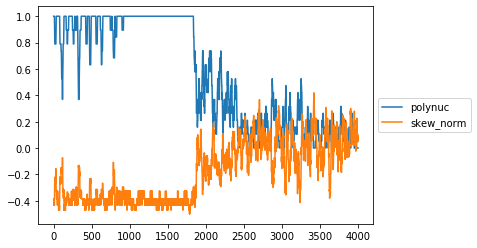

In [261]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:4000, ["polynuc", "skew_norm"]].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


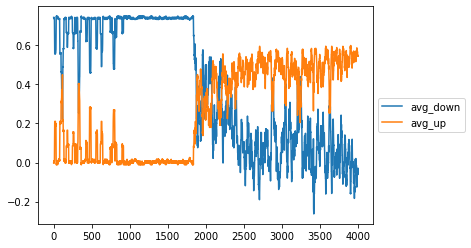

In [262]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:4000, ["avg_down", "avg_up"]].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


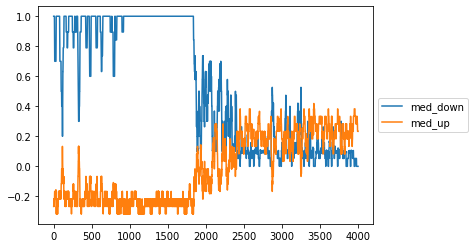

In [263]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:4000, ["med_down", "med_up"]].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


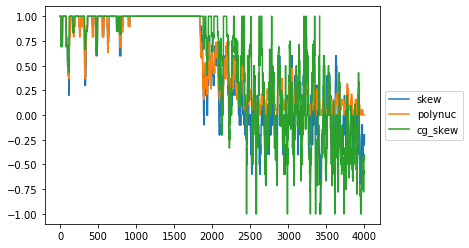

In [264]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:4000, ["skew", "polynuc", "cg_skew"]].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


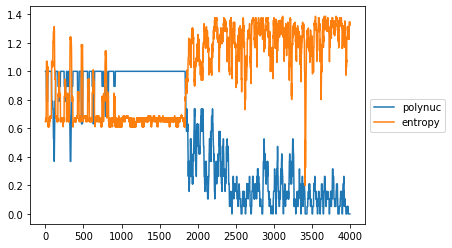

In [416]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:4000, ["polynuc", "entropy"]].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


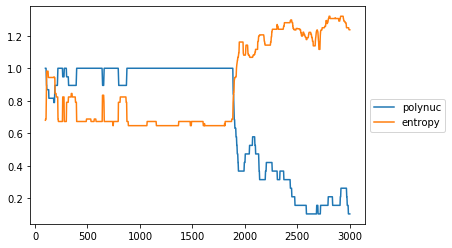

In [334]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:3000, ["polynuc", "entropy"]].rolling(100).median().plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


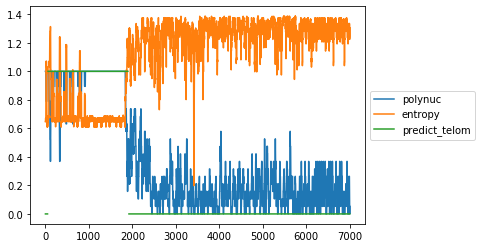

In [325]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:000, ["polynuc", "entropy", "predict_telom"]].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


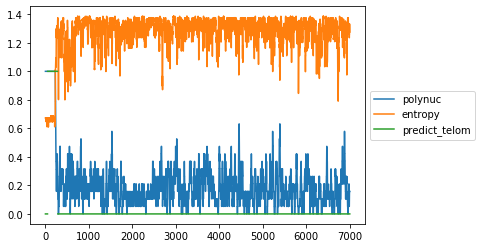

In [331]:
seq_df.loc["test.telo.blocks", "chrI"].loc[0:7000, ["polynuc", "entropy", "predict_telom"]].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


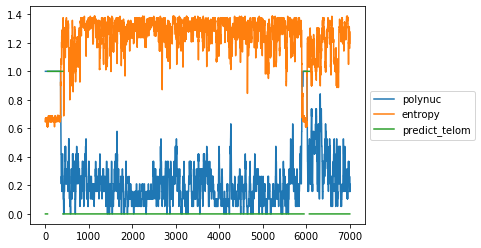

In [332]:
seq_df.loc["test.telo.blocks", "chrVI"].loc[0:7000, ["polynuc", "entropy", "predict_telom"]].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


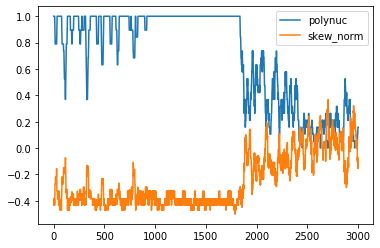

In [270]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:3000, ["polynuc", "skew_norm"]].plot()

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


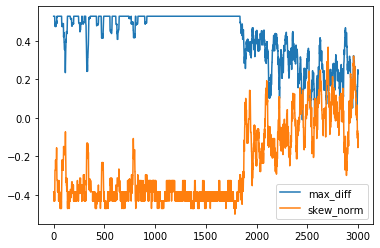

In [271]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:3000, ["max_diff", "skew_norm"]].plot()

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


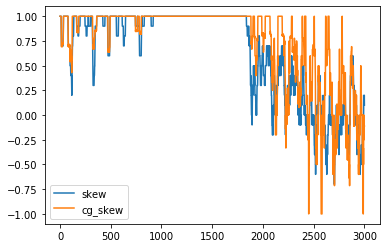

In [272]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:3000, ["skew", "cg_skew"]].plot()

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


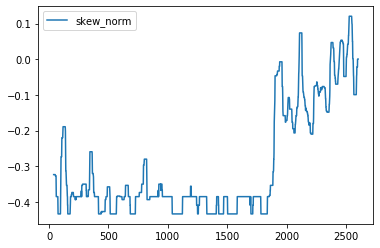

In [244]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:2600, ["skew_norm"]].rolling(40).median().plot()

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


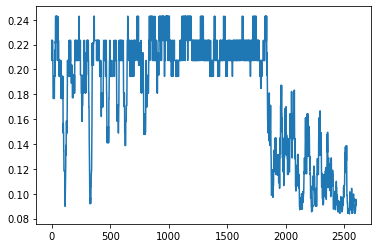

In [245]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:2600,"chi2"].plot()

In [246]:
df = seq_df
df.loc[:, "combined"] = (
        df.loc[:, "chi2"]
        + df.loc[:, "skew"]
        + df.loc[:, "polynuc"]
        - df.loc[:, "entropy"]
    )
df

pattern  skew   cg_skew   entropy  \
test.telo.blocks chrI_ACA_left 0          1.0   1.0  1.000000  0.647447   
                               1          1.0   1.0  1.000000  0.647447   
                               2          1.0   1.0  1.000000  0.610864   
                               3          1.0   1.0  1.000000  0.610864   
                               4          1.0   1.0  1.000000  0.562335   
...                                       ...   ...       ...       ...   
                 chrVI         16146      0.0   0.1 -0.200000  1.235347   
                               16147      0.0   0.1 -0.200000  1.235347   
                               16148      0.0   0.0 -0.200000  1.248781   
                               16149      0.0   0.0 -0.333333  1.279854   
                               16150      0.0  -0.1 -0.333333  1.287022   

                                       polynuc  skew_norm      chi2  \
test.telo.blocks chrI_ACA_left 0      1.000000    -0.3848  0.223319   
                               1      1.000000    -0.3848  0.223319   
                               2      1.000000    -0.3264  0.242785   
                               3      1.000000    -0.3264  0.242785   
                               4      1.000000    -0.2580  0.265585   
...                                        ...        ...       ...   
                 chrVI         16146  0.105263    -0.0468  0.087585   
                               16147  0.157895    -0.0468  0.087585   
                               16148  0.157895     0.0016  0.084252   
                               16149  0.157895    -0.0068  0.087052   
                               16150  0.157895     0.0466  0.085385   

                                      freq_norm_T  freq_norm_C  max_diff  \
test.telo.blocks chrI_ACA_left 0            0.267       -0.267  0.527378   
                               1            0.267       -0.267  0.527378   
                               2            0.317       -0.317  0.527378   
                               3            0.317       -0.317  0.527378   
                               4            0.367       -0.367  0.527378   
...                                           ...          ...       ...   
                 chrVI         16146        0.167        0.283  0.102578   
                               16147        0.167        0.283  0.102578   
                               16148        0.217        0.283  0.092578   
                               16149        0.217        0.283  0.100978   
                               16150        0.267        0.283  0.095978   

                                      combined  skew-ent  avg_down  med_down  \
test.telo.blocks chrI_ACA_left 0      1.575872  0.352553  0.741106  1.000000   
                               1      1.575872  0.352553  0.741106  1.000000   
                               2      1.631921  0.389136  0.747595  1.000000   
                               3      1.631921  0.389136  0.747595  1.000000   
                               4      1.703250  0.437665  0.755195  1.000000   
...                                        ...       ...       ...       ...   
                 chrVI         16146 -0.942498 -1.135347  0.097616  0.100000   
                               16147 -0.889867 -1.135347  0.115160  0.100000   
                               16148 -1.006634 -1.248781  0.080716  0.084252   
                               16149 -1.034907 -1.279854  0.081649  0.087052   
                               16150 -1.143742 -1.387022  0.047760  0.085385   

                                        avg_up  med_up  
test.telo.blocks chrI_ACA_left 0     -0.001451  -0.267  
                               1     -0.001451  -0.267  
                               2     -0.010845  -0.317  
                               3     -0.010845  -0.317  
                               4     -0.020888  -0.258  
...                                        ...     ...  
           

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


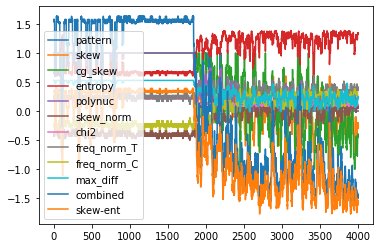

In [219]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:4000].plot()

In [220]:
poly_df.loc[("test.telo.blocks", "chrI_ACA_left"),0:10000].transpose().plot()

NameError: name 'poly_df' is not defined

# For control_not_telom_merging.py refactoring

L61

In [17]:
set("ATTTTAAAT") == {"A", "T"}

True

In [15]:
set(seq) 

{'A', 'C', 'G', 'N', 'T'}

In [4]:
seq = "ACGATCGATCGTAGCTGATGCTAGTCNNNNNGCTAGCTAGCTAGTCGTCGATGTC"

In [13]:
starts_N = seq.find("NNNNN")

In [14]:
starts_N

26

In [88]:
seq = "CACCACCACCACACACCACCACACACTGACGATGACTAGACGT"
for window in atl.sliding_window(seq, 0, len(seq), 10):
    print(atl.get_entropy(window))

0.6108643020548935
0.6730116670092565
0.6108643020548935
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.9433483923290393
1.1682824501765625
1.1935496040981333
1.1935496040981333
1.2798542258336676
1.2798542258336676
1.366158847569202
1.366158847569202
1.366158847569202
1.366158847569202
1.366158847569202
1.3321790402101223
1.366158847569202
1.2798542258336674
1.3321790402101223
1.366158847569202
1.366158847569202


<generator object sliding_window at 0x7fe9f62e7850>

In [73]:
seq2 = ("../../misc/test.telo.blocks", "chrI_ACA_left")
seq2

('../../misc/test.telo.blocks', 'chrI_ACA_left')

In [85]:
import numpy as np
x = 0.1
x*np.log(x)


-0.23025850929940456